train loss:1.8057533550919644
=== epoch:1, train acc:0.272, test acc:0.243 ===
train loss:1.5740965206399355
train loss:1.493332063936866
train loss:1.2822806442574666
train loss:1.1085277791622425
train loss:1.1399809635924867
train loss:0.9005197074025815
train loss:0.7319679489874409
train loss:0.799596519481904
train loss:0.9095443144959445
train loss:0.7669557216228011
train loss:0.8423945872307513
train loss:0.8293619602820919
train loss:0.7208401190768585
train loss:0.5486013570138016
train loss:0.7825345553905352
train loss:0.5917689782938624
train loss:0.6637604321028553
train loss:0.6144973775719805
train loss:0.7804529737272812
train loss:0.636275274844062
train loss:0.5220900142747085
train loss:0.6716870158409847
train loss:0.6917260692852483
train loss:0.6646842522887492
train loss:0.5133283490163916
train loss:0.47645557970980135
train loss:0.5590643077384504
train loss:0.5225858102769968
train loss:0.7290094512980886
train loss:0.44122509395856907
train loss:0.736699369

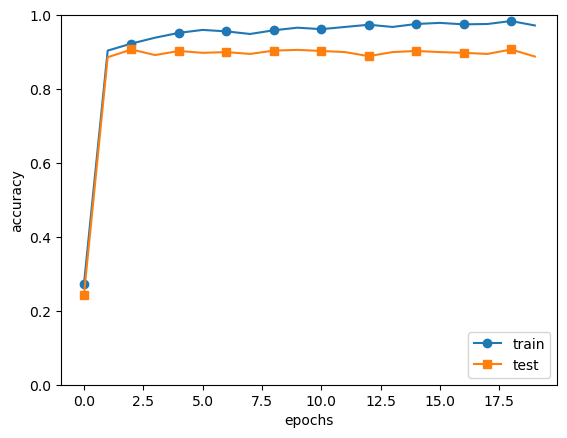

In [1]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST  
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

def load_fashion_mnist(flatten=False):
    mndata = MNIST('./data/fashion-mnist')  
    x_train, t_train = mndata.load_training()
    x_test, t_test = mndata.load_testing()
    
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    
    if not flatten:
        x_train = x_train.reshape(-1, 1, 28, 28)
        x_test = x_test.reshape(-1, 1, 28, 28)
    
    t_train = np.array(t_train)
    t_test = np.array(t_test)
    
    return (x_train, t_train), (x_test, t_test)

(x_train, t_train), (x_test, t_test) = load_fashion_mnist(flatten=False)

max_epochs = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

network.save_params("params.pkl")
print("Saved Network Parameters!")

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
